In [4]:
from collision_checker.collision import *
from collision_checker.check import get_collision_info, get_safe_lattice
from collision_checker.lattice import qubit_lattice
from collision_checker.visualize import visualize, visualize_all

# Check Design Frequency

In [5]:
# generate ideal (4d*4d)-qubit square lattice

d = 2
n = 4*d**2

design_info = {
    "a" : {"frequency":7795, "anharmonicity":-325},
    "b" : {"frequency":7865, "anharmonicity":-331},
    "c" : {"frequency":7935, "anharmonicity":-337},
    "d" : {"frequency":8005, "anharmonicity":-343},
    "A" : {"frequency":8645, "anharmonicity":-400},
    "B" : {"frequency":8715, "anharmonicity":-407},
    "C" : {"frequency":8785, "anharmonicity":-413},
    "D" : {"frequency":8855, "anharmonicity":-420},
}

node_info = {}
edge_info = {}
for i in range(d): # mux row index
    for j in range(d): # mux column index
        midx = i*d + j

        if (i%2 == 0) ^ (j%2 == 0):
            mux_pattern = {0:"d", 1:"C", 2:"A", 3:"c"}
        else:
            mux_pattern = {0:"a", 1:"B", 2:"D", 3:"b"}
                
        for k in range(4): # inner mux index
            qidx = 4*midx + k
            node_info[qidx] = design_info[mux_pattern[k]]

In [6]:
# declare lattice structure
nodes, edges, pos = qubit_lattice(n,d)

# add frequency collisions which you want to take into account
condition = [
    Type0A(), Type0B(), Type1A(), Type1B(), Type2A(),
    Type2B(), Type3(safe_mode=False), Type7(), Type8(), Type9()
]

# calcualte collisions and find safe lattice
collision_info = get_collision_info(condition, nodes, edges, node_info, edge_info)
safe_nodes, safe_edges = get_safe_lattice(nodes, edges, collision_info)

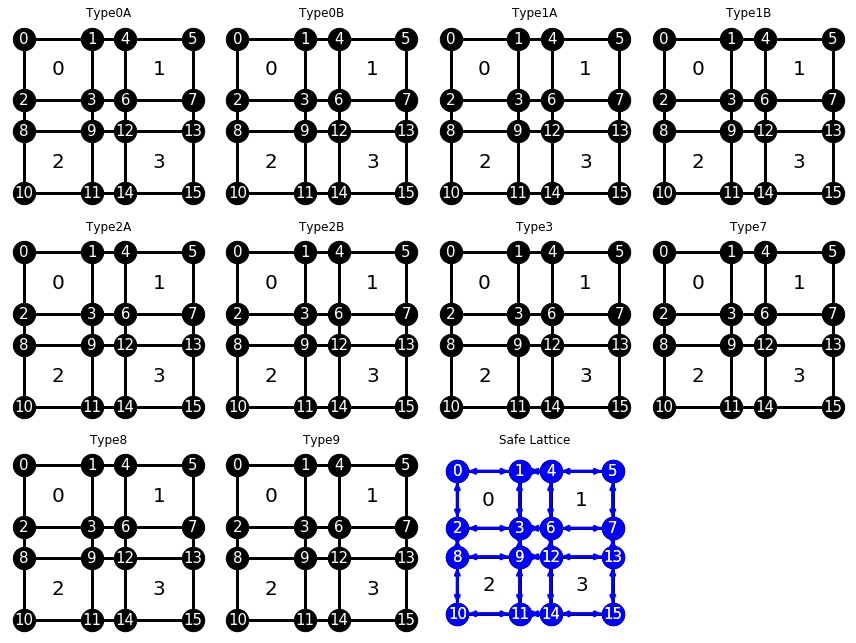

In [7]:
# visualization
visualize_all(n, d, collision_info, safe_nodes, safe_edges)

# Analyze Experimental Data

In [8]:
# test data for (8*8)-qubit lattice
import pandas as pd
node_info = pd.read_pickle("example.pickle")
edge_info = {}

In [9]:
# declare lattice structure
n, d = 64, 4
nodes, edges, pos = qubit_lattice(n,d)

# add frequency collisions which you want to take into account
condition = [
    Type0A(), Type0B(), Type1A(), Type1B(), Type2A(),
    Type2B(), Type3(safe_mode=False), Type7(), Type8(), Type9()
]

# calcualte collisions and find safe lattice
collision_info = get_collision_info(condition, nodes, edges, node_info, edge_info)
safe_nodes, safe_edges = get_safe_lattice(nodes, edges, collision_info)

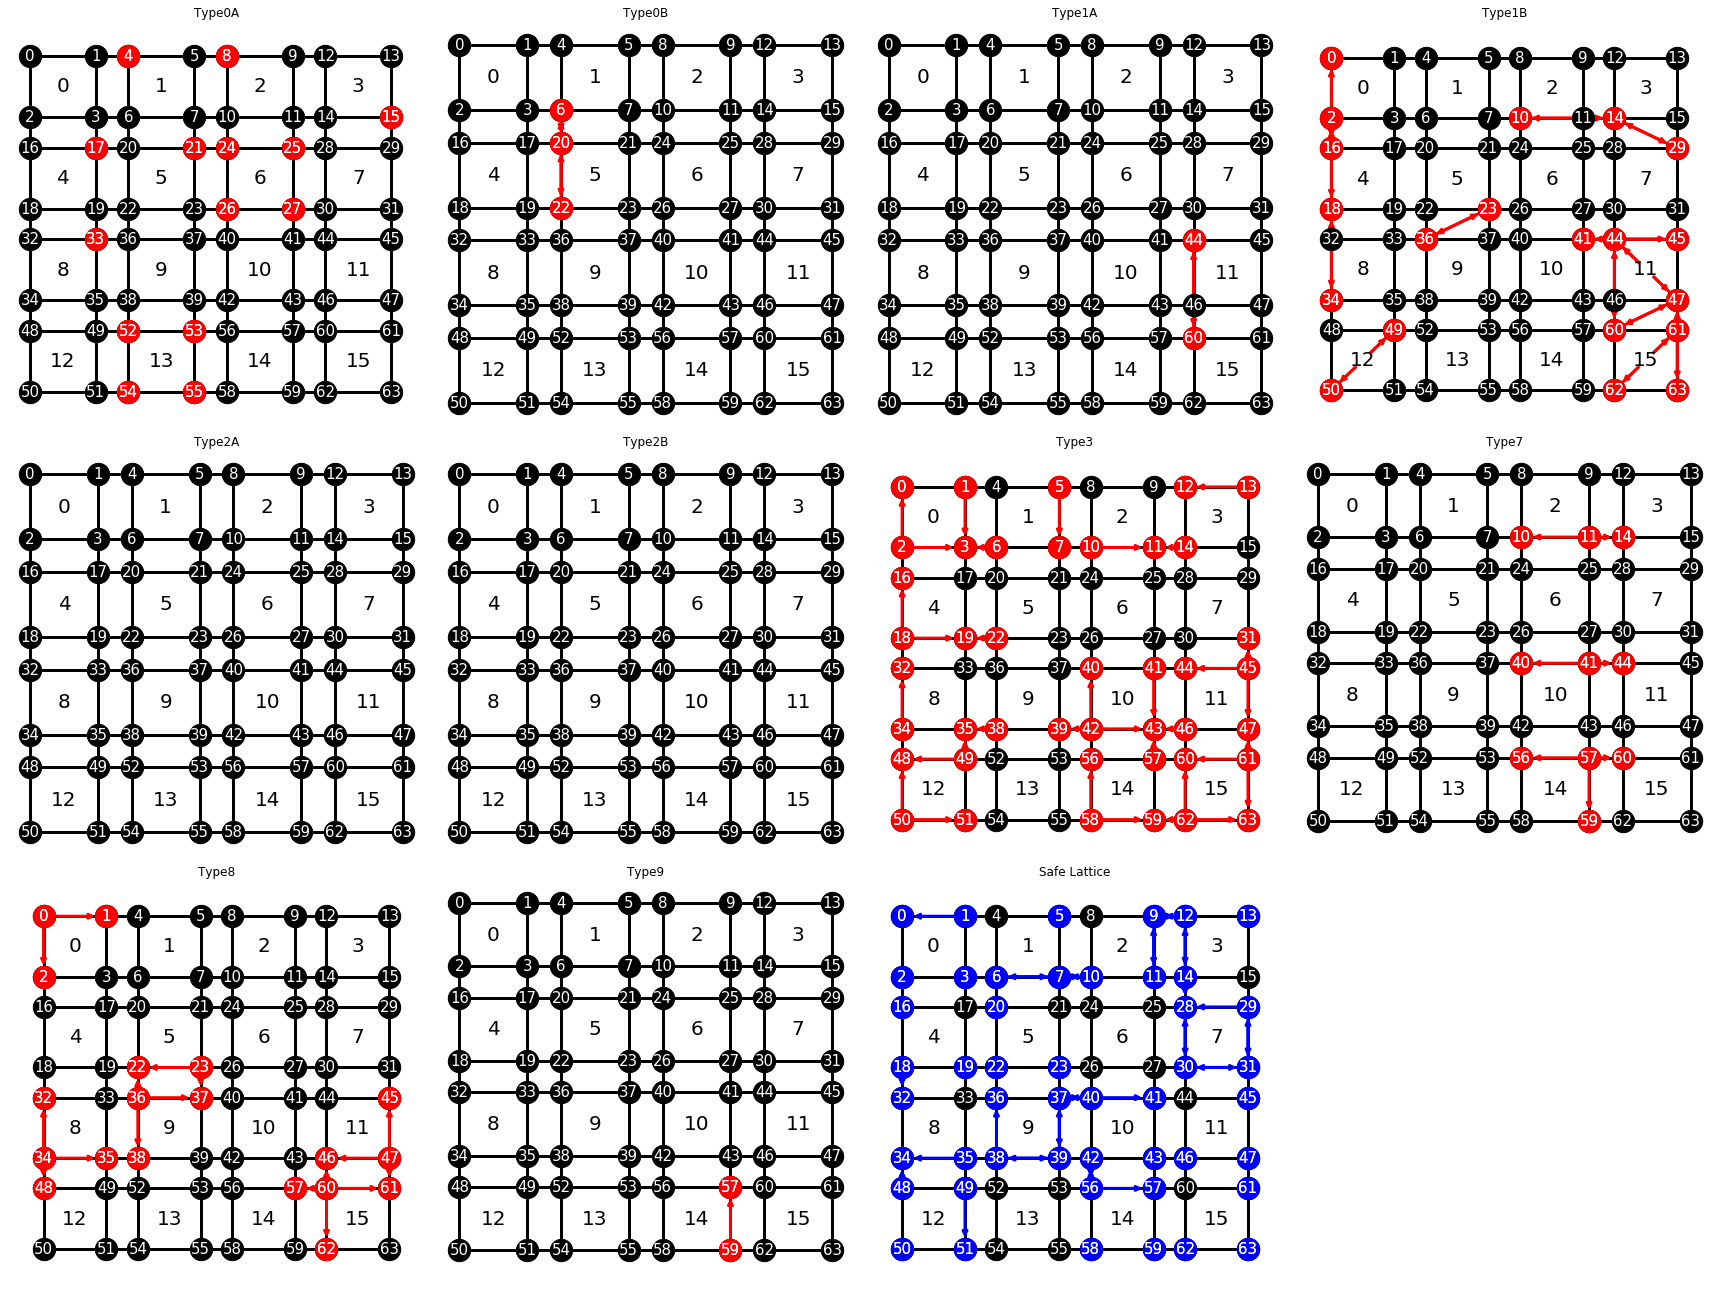

In [10]:
# visualization
visualize_all(n, d, collision_info, safe_nodes, safe_edges)